# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

!pip install wordcloud
from wordcloud import WordCloud

# Reading Data

In [2]:
df = pd.read_csv("Finance_Data.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [5]:
df.shape

(4845, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   statement  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [8]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [9]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,Technopolis plans to develop in stages an area...
freq,2871,1


# WordCloud

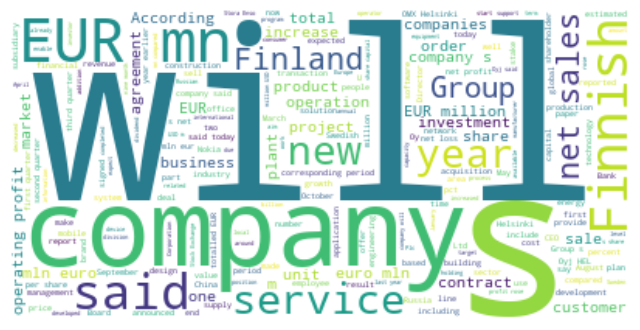

In [10]:
text = " ".join([x for x in df.statement])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

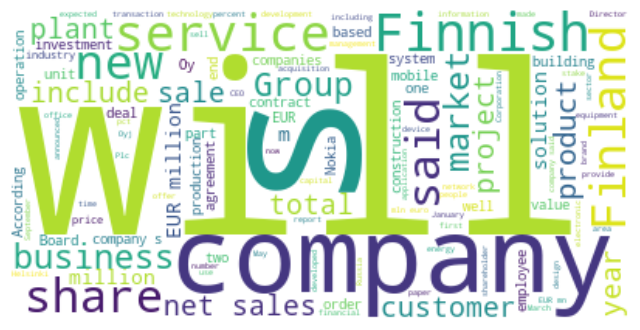

In [11]:
## for neutral

text = " ".join([x for x in df.statement[df.sentiment=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

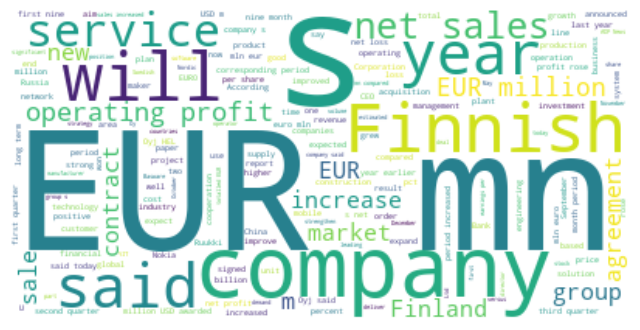

In [12]:
## for positive

text = " ".join([x for x in df.statement[df.sentiment=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

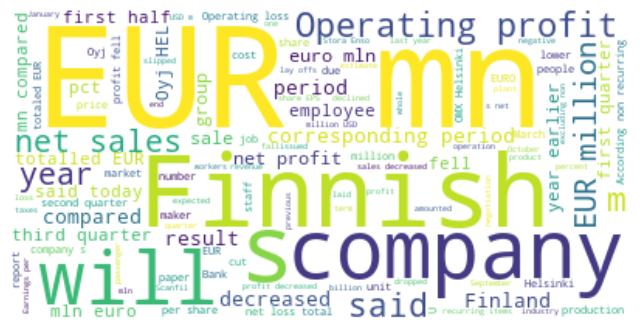

In [13]:
## for negative

text = " ".join([x for x in df.statement[df.sentiment=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Count plot of sentiments

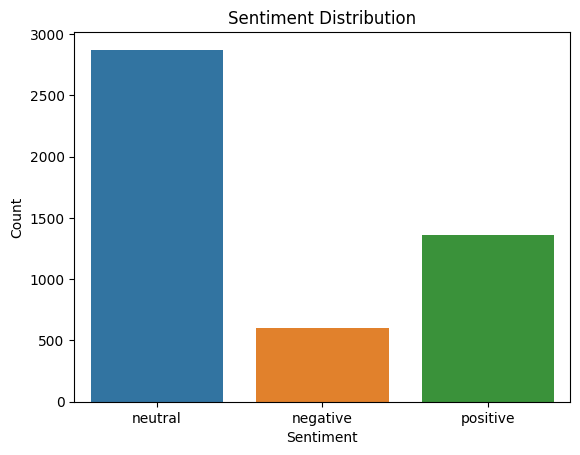

In [14]:
#sns.countplot(df.sentiment)\
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for sentiment distribution
sns.countplot(data=df, x='sentiment')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Show the plot

plt.show()


In [15]:
df['sentiment'].value_counts()

sentiment
neutral     2871
positive    1362
negative     604
Name: count, dtype: int64

# Test and Train dataframes

In [16]:
train,eva = train_test_split(df,test_size = 0.2)

# Building a model

In [18]:
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


  Obtaining dependency information for simpletransformers from https://files.pythonhosted.org/packages/16/c8/20d7eede93e320c0746c01d2205bdbeb388c236247244b9428e743a96de9/simpletransformers-0.64.3-py3-none-any.whl.metadata
  Using cached simpletransformers-0.64.3-py3-none-any.whl.metadata (42 kB)
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/66/f8/38298237d18d4b6a8ee5dfe390e97bed5adb8e01ec6f9680c0ddf3066728/datasets-2.14.4-py3-none-any.whl.metadata
  Using cached datasets-2.14.4-py3-none-any.whl.metadata (19 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Obtaining dependency information for wandb>=0.10.32 from https://files.pythonhosted.org/packages/ed/d7/8927aef63869d5d379adb63dc97f9cbc53830fdf85457b84a156fabcb231/wandb-0.15.8-py3-none-any.whl.metadata
  Using cached wandb-0.15.8-py3-none-any.whl.metadata (8.3 kB)
  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/20/fb/c52ddcedbb0cb142ab6f22

C:\Users\Public.DESKTOP-074PO7P\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [20]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [21]:
model.train_model(train_df)

C:\Users\Public.DESKTOP-074PO7P\AppData\Local\Programs\Python\Python311\Lib\site-packages\simpletransformers\classification\classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
Epoch 1 of 1: 100%|████████████████████████████████████████████████████████████████████| 1/1 [36:38<00:00, 2198.07s/it]


(188, 0.6653601252969276)

In [22]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

C:\Users\Public.DESKTOP-074PO7P\AppData\Local\Programs\Python\Python311\Lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
Running Evaluation: 100%|██████████████████████████████████████████████████████████████| 50/50 [03:24<00:00,  4.10s/it]


# Model Evaluation

In [23]:
result

{'mcc': 0.6392060641517738, 'eval_loss': 0.4869431449472904}

In [24]:
model_outputs

array([[-0.21020371, -2.18620968,  2.17757511],
       [-0.79842424, -1.61022854,  2.002491  ],
       [-0.15713371,  1.93229985, -1.46792006],
       ...,
       [-0.53572887, -2.09238935,  2.41593146],
       [ 0.56330436, -2.64653873,  1.76036513],
       [ 1.86299682, -1.46378803,  0.02321154]])

In [25]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [26]:
true = eval_df['label'].tolist()
predicted = lst

In [27]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 72,   4,  34],
       [  2,  36,  10],
       [ 19,   8, 215]], dtype=int64)

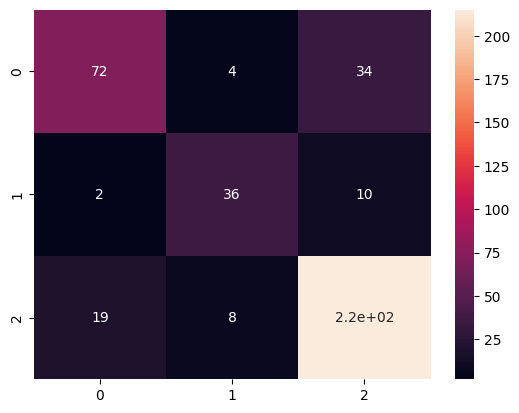

In [28]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [29]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.77      0.65      0.71       110\n     neutral       0.75      0.75      0.75        48\n    negative       0.83      0.89      0.86       242\n\n    accuracy                           0.81       400\n   macro avg       0.78      0.76      0.77       400\nweighted avg       0.81      0.81      0.80       400\n'

In [30]:
sklearn.metrics.accuracy_score(true,predicted)

0.8075